In [59]:
import xarray as xr
import numpy as np
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import argopy
from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher()
import cmocean
import gsw

(<Figure size 900x540 with 1 Axes>,
 <GeoAxesSubplot:xlabel='longitude', ylabel='latitude'>)

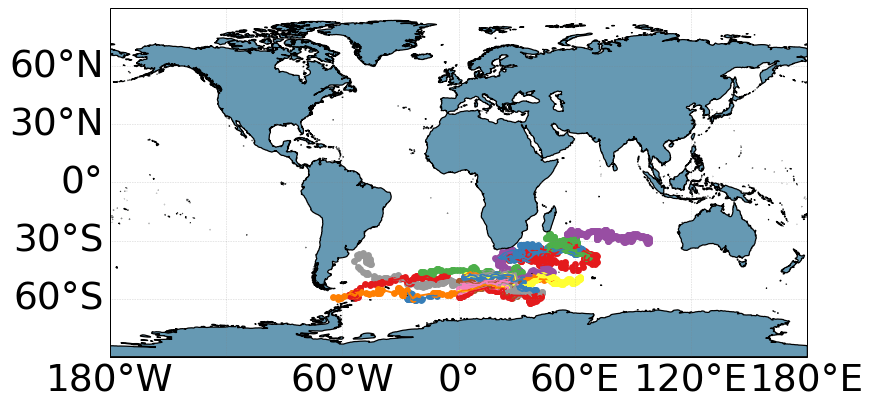

In [174]:
float_li = [1902281,1902218,6902777,3901224,6904067,1902294,1902292,1902295,7900510,7900577,6904068,6900790,1901837,1902030,1902032,5902355,3901949,3901966,3901963,7900517]

global_map = ArgoDataFetcher().float(float_li).load()
global_map.plot('trajectory', set_global=True)

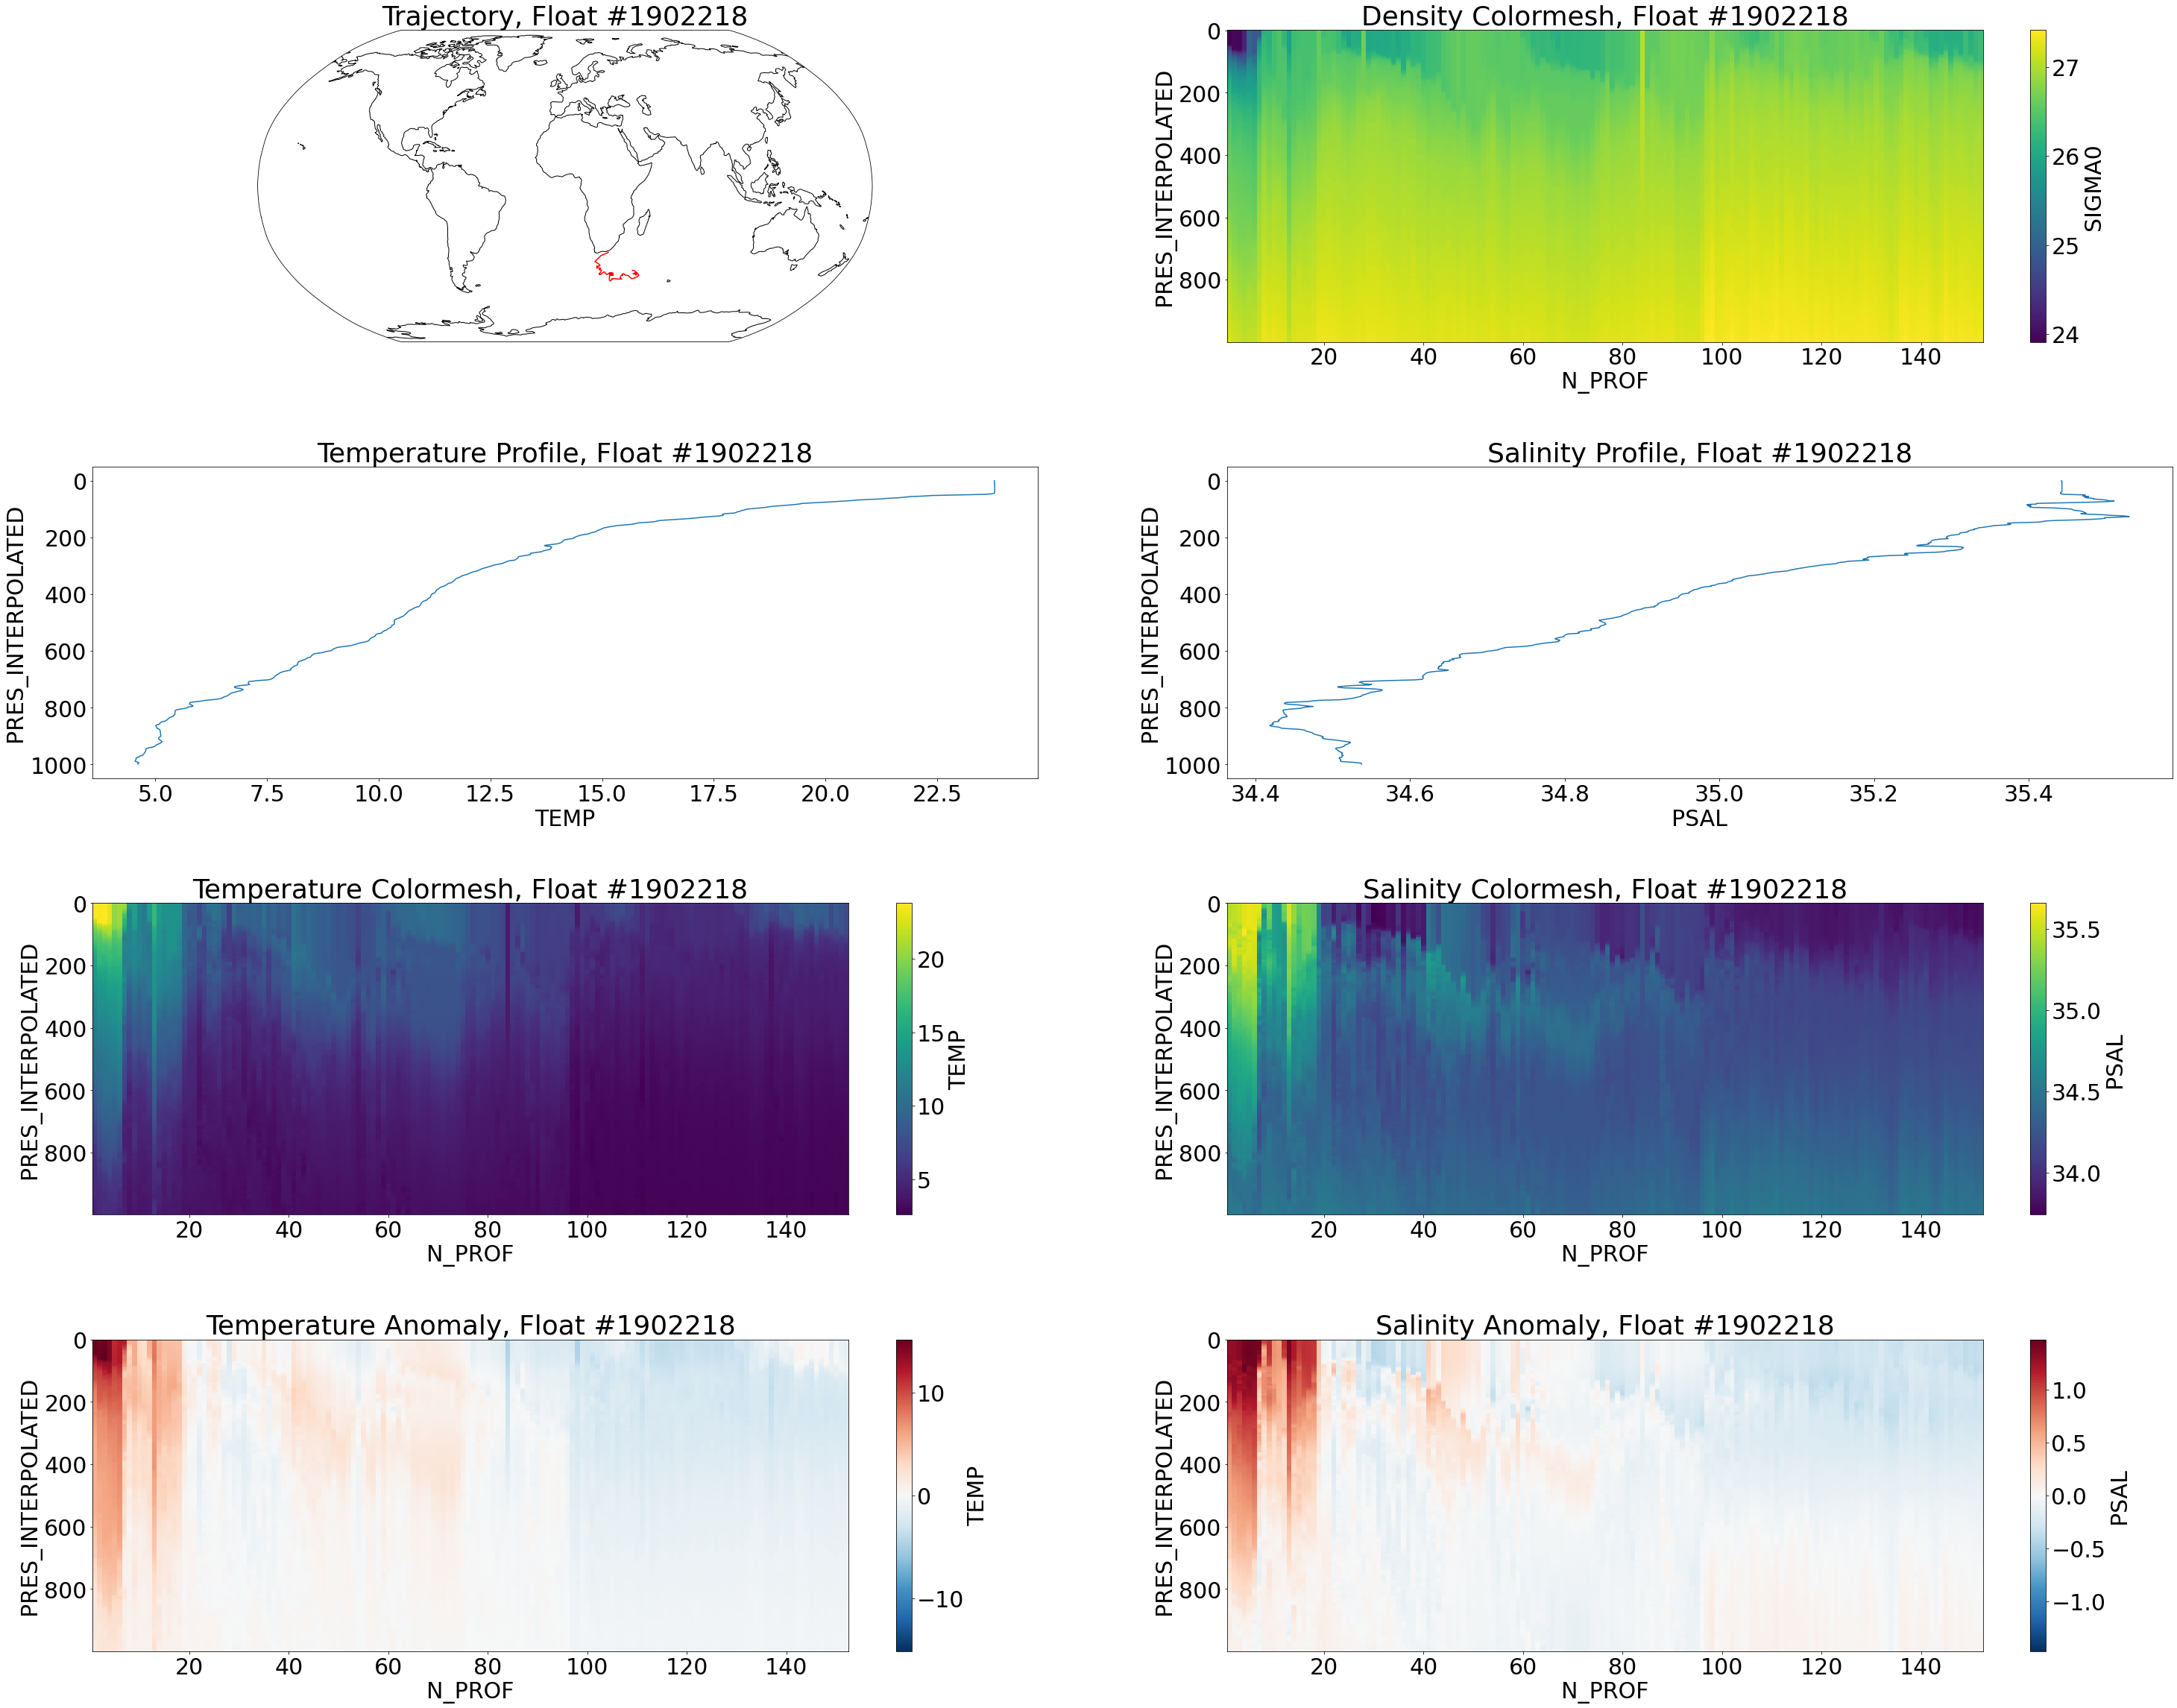

In [186]:
def float_plot(float_id):
    afloat = argo_loader.float(float_id).to_xarray()
    afloat_prof = afloat.argo.point2profile()
    levels = list(range(0, 1000))
    afloat_interp = afloat_prof.argo.interp_std_levels(levels)
    
    temp = afloat_interp.TEMP
    temp_anom = temp - temp.mean('N_PROF')
    sal = afloat_interp.PSAL
    sal_anom = sal - sal.mean('N_PROF')
    pres = afloat_interp.PRES
    plt.rcParams['font.size'] = '30'

    
    #Map of float path
    fig = plt.figure(figsize=(50,40))
    ax = fig.add_subplot(4,2,1, projection=ccrs.Robinson())
    ax.set_global()
    ax.coastlines()
    ax.plot(afloat_interp.LONGITUDE, afloat_interp.LATITUDE, transform=ccrs.PlateCarree(), color='r')
    plt.title("Trajectory, Float #{}".format(int(afloat_prof.PLATFORM_NUMBER[0])))

    #Density vs depth
    plt.subplot(4,2,2)
    SIGMA0 = xr.apply_ufunc(gsw.sigma0, sal, temp, dask='parallelized', output_dtypes=[float,]).rename('SIGMA0')
    SIGMA0.plot(y='PRES_INTERPOLATED', yincrease=False)
    plt.title("Density Colormesh, Float #{}".format(int(afloat_prof.PLATFORM_NUMBER[0])))
    
    #Temperature profile
    plt.subplot(4,2,3)
    afloat_interp.isel(N_PROF=0).TEMP.plot(y='PRES_INTERPOLATED', yincrease=False)
    plt.title("Temperature Profile, Float #{}".format(int(afloat_prof.PLATFORM_NUMBER[0])))
    
    #Salinity profile
    plt.subplot(4,2,4)
    afloat_interp.isel(N_PROF=0).PSAL.plot(y='PRES_INTERPOLATED', yincrease=False)
    plt.title("Salinity Profile, Float #{}".format(int(afloat_prof.PLATFORM_NUMBER[0])))

    #Temperature colormesh
    plt.subplot(4,2,5)
    temp.plot(x='N_PROF', yincrease=False)
    plt.title("Temperature Colormesh, Float #{}".format(int(afloat_prof.PLATFORM_NUMBER[0])))

    #Salinity colormesh
    plt.subplot(4,2,6)
    sal.plot(x='N_PROF', yincrease=False)
    plt.title("Salinity Colormesh, Float #{}".format(int(afloat_prof.PLATFORM_NUMBER[0])))

    #Temperature anomaly
    plt.subplot(4,2,7)
    temp_anom.plot(x='N_PROF', yincrease=False)
    plt.title("Temperature Anomaly, Float #{}".format(int(afloat_prof.PLATFORM_NUMBER[0])))
    
    #Salinity anomaly
    plt.subplot(4,2,8)
    sal_anom.plot(x='N_PROF', yincrease=False)
    plt.title("Salinity Anomaly, Float #{}".format(int(afloat_prof.PLATFORM_NUMBER[0])))
    
    plt.subplots_adjust(wspace=0.2, hspace=0.4)
    
    return

float_plot(float_li[1])